In [1]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from boruta import BorutaPy

In [3]:
#Reading csv file 1
secom_labels_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom_labels.data'
labels=pd.read_csv(secom_labels_data,header=None,sep=' ',names=['status','timestamp'])

In [4]:
#Generate an empty list to put column names in
column_list=[]

In [5]:
#Naming columns 0-590
for x in range(591):
    column_list.append(f'col{x}')

In [6]:
#Remove the first column name as it starts with 0
column_list.remove('col0')

In [7]:
#Reading csv file 2
secom_data='https://raw.githubusercontent.com/hugo-am/SECOM_HTWG2/refs/heads/Rebekah/secom.data'
data=pd.read_csv(secom_data,header=None,sep=' ',names=column_list)

In [8]:
#Data file has 590 columns and 1567 rows
print(data.shape)
data.head()

(1567, 590)


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col581,col582,col583,col584,col585,col586,col587,col588,col589,col590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [9]:
#Generate base dataframe
df=data.merge(labels,left_index=True,right_index=True)
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col583,col584,col585,col586,col587,col588,col589,col590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00


Missing Values Treatment - Remove 8 Features

In [10]:
#Missing values, Drop the 'status' and 'timestamp' columns
missing = df.drop(columns=['status', 'timestamp']).isna().sum().sort_values(ascending=False)

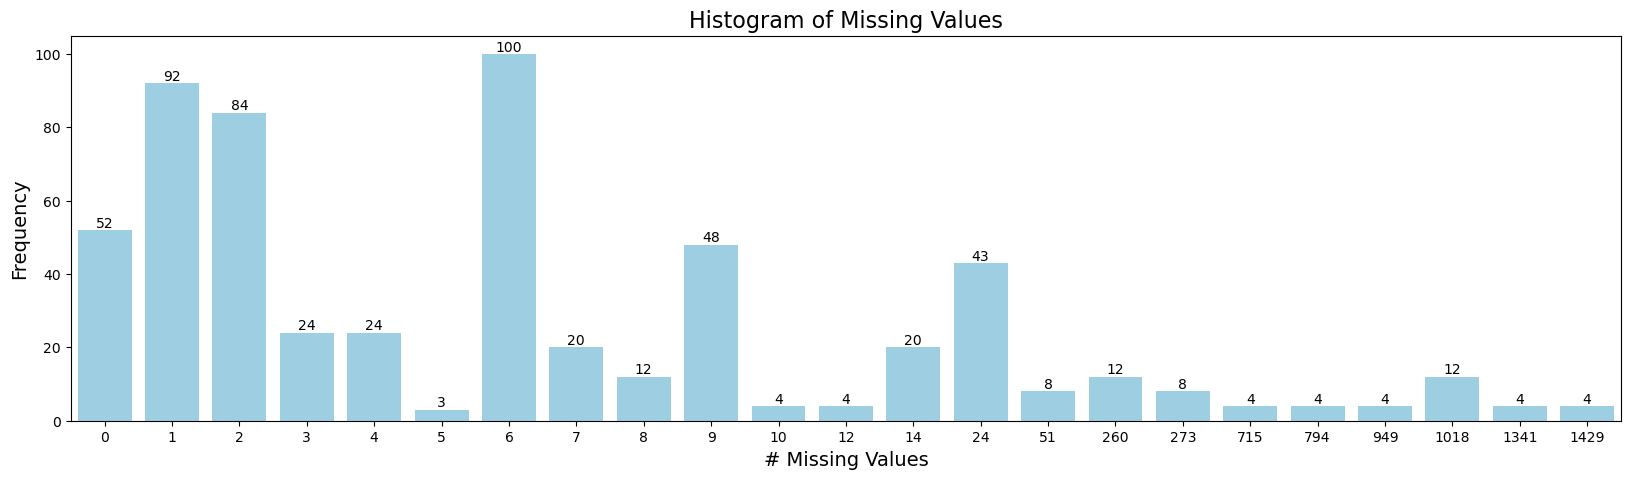

In [11]:
# Sort the missing value counts in descending order
missing_counts = missing.value_counts().sort_values(ascending=False)

# Plot the sorted histogram with axis labels
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values", fontsize=16)  # Title for the plot

# Add label markers above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.show()

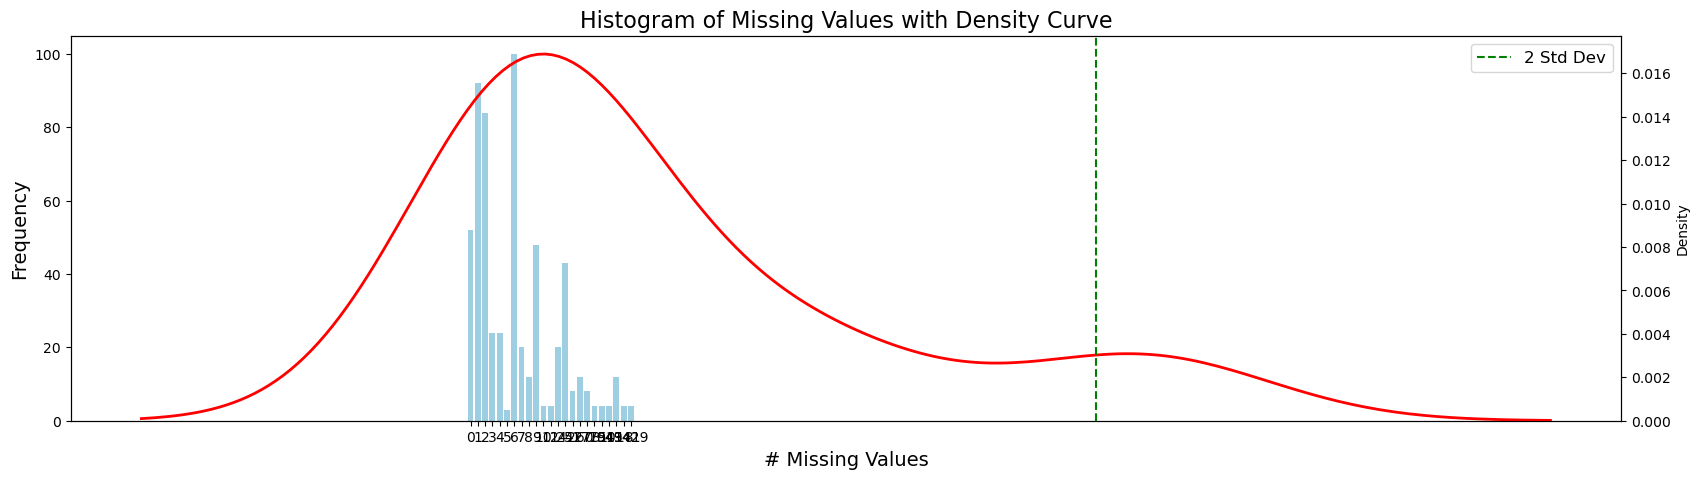

In [12]:
# Plot the histogram of missing values - DID NOT END UP USING THIS IN PRESENTATION DUE TO CURVE SHAPE
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, color='skyblue')  # Set bar color to blue
plt.xlabel("# Missing Values", fontsize=14)  # Label for x-axis
plt.ylabel("Frequency", fontsize=14)        # Label for y-axis
plt.title("Histogram of Missing Values with Density Curve", fontsize=16)  # Title for the plot

# Plot the density curve
sns.kdeplot(missing_counts.values, color='red', linewidth=2, ax=ax.twinx())  # Use a secondary y-axis for the density curve

# Calculate the 2 standard deviation line
std_dev = missing_counts.std()
mean_value = missing_counts.mean()
two_std_line = mean_value + 2 * std_dev

# Add a vertical line at the 2 standard deviation mark
plt.axvline(x=two_std_line, color='green', linestyle='--', linewidth=1.5, label='2 Std Dev')

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.show()

In [13]:
# Calculate +3 and -3 standard deviations of missing VALUES to determine what % of missing values can be considered outliers and inform threshold for removal
plus_3_std = mean_value + 3 * std_dev
minus_3_std = mean_value - 3 * std_dev

print(f"+3 Standard Deviations: {plus_3_std}")
print(f"-3 Standard Deviations: {minus_3_std}")

+3 Standard Deviations: 115.82296048490468
-3 Standard Deviations: -64.51861265881774


In [14]:
#Analyze missing value basic counts and percentages (Avg Missing, Top 20% Pareto, Below 25% missing)
# Step 1: Calculate missing counts and missing percentages
missing_counts = df.isna().sum()
missing_percentage = (missing_counts / df.shape[0]) * 100  # 1567 rows

# Step 2: Basic counts
num_features_total = df.shape[1]
num_features_no_missing = (missing_counts == 0).sum()
num_features_25 = ((missing_counts > 0) & (missing_percentage < 25)).sum()
num_features_50 = ((missing_percentage >= 25) & (missing_percentage < 50)).sum()
num_features_half_missing = (missing_percentage >= 50).sum()
total_missing_values = df.isna().sum().sum()
total_missing_percentage = (total_missing_values / (df.shape[0] * data.shape[1])) * 100

print(f"Total features: {num_features_total}")
print(f"Features with NO missing values: {num_features_no_missing} ( {num_features_no_missing/num_features_total*100:.2f}% )")
print(f"Features with missing values between 0-25%: {num_features_25} ( {num_features_25/num_features_total*100:.2f}% )")
print(f"Features with missing values between 25-50%: {num_features_50} ( {num_features_50/num_features_total*100:.2f}% )")
print(f"Features with >=50% missing values: {num_features_half_missing} ( {num_features_half_missing/num_features_total*100:.2f}% )")
print(f"Total missing values in the 'data' dataset: {total_missing_values}")


# Step 3: Summary statistics
print("\nSummary of Missing Percentage:")
print(f"Minimum missing %: {missing_percentage.min():.2f}%")
print(f"Maximum missing %: {missing_percentage.max():.2f}%")
print(f"Mean missing %: {missing_percentage.mean():.2f}%")
print(f"Total percentage of missing values in the 'data' dataset: {total_missing_percentage:.2f}%")
print(f"Median missing %: {missing_percentage.median():.2f}%")

# Step 4: Top 10 features with most missingness
top_missing_features = missing_percentage.sort_values(ascending=False).head(10)
print("\nTop 10 features with highest missingness:")
print(top_missing_features)

Total features: 592
Features with NO missing values: 54 ( 9.12% )
Features with missing values between 0-25%: 506 ( 85.47% )
Features with missing values between 25-50%: 4 ( 0.68% )
Features with >=50% missing values: 28 ( 4.73% )
Total missing values in the 'data' dataset: 41951

Summary of Missing Percentage:
Minimum missing %: 0.00%
Maximum missing %: 91.19%
Mean missing %: 4.52%
Total percentage of missing values in the 'data' dataset: 4.54%
Median missing %: 0.38%

Top 10 features with highest missingness:
col158    91.193363
col293    91.193363
col294    91.193363
col159    91.193363
col493    85.577537
col359    85.577537
col86     85.577537
col221    85.577537
col247    64.964901
col110    64.964901
dtype: float64


In [15]:
#calculate 3s of missing PERCENT to determine what % of missing values can be considered outliers and inform threshold for removal
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_3_std_missing_percentage = mean_missing_percentage + 3 * std_missing_percentage
minus_3_std_missing_percentage = mean_missing_percentage - 3 * std_missing_percentage

print(f"+3 Standard Deviations: {plus_3_std_missing_percentage}")
print(f"-3 Standard Deviations: {minus_3_std_missing_percentage}")

+3 Standard Deviations: 50.75252628822414
-3 Standard Deviations: -41.70808778462801


In [16]:
#calculate 4s of missing PERCENT to determine what % of missing values can be considered outliers and inform threshold for removal
mean_missing_percentage = missing_percentage.mean()
std_missing_percentage = missing_percentage.std()

plus_4_std_missing_percentage = mean_missing_percentage + 4 * std_missing_percentage
minus_4_std_missing_percentage = mean_missing_percentage - 4 * std_missing_percentage

print(f"+4 Standard Deviations: {plus_4_std_missing_percentage}")
print(f"-4 Standard Deviations: {minus_4_std_missing_percentage}")

+4 Standard Deviations: 66.1626286336995
-4 Standard Deviations: -57.11819013010337


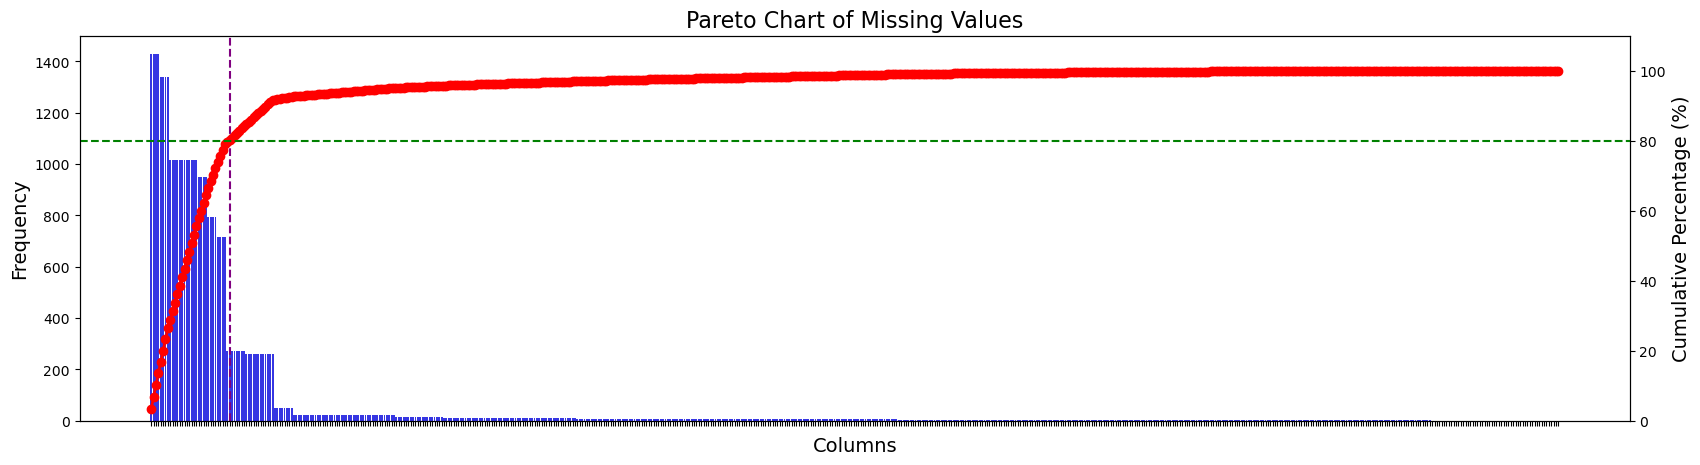

In [17]:
#Pareto Chart of Missing Values as a Count of Values
# # Calculate missing value counts and sort them in descending order
missing_counts = df.isna().sum().sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = missing_counts.cumsum() / missing_counts.sum() * 100

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing value counts
sns.barplot(x=missing_counts.index, y=missing_counts.values, alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(missing_counts.index, cumulative_percentage, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_index = cumulative_percentage[cumulative_percentage > 80].index[0]

# Add vertical line at the threshold column
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [18]:
# Combine missing counts and cumulative percentage into a DataFrame for better readability
missing_pct=missing_counts.values / df.shape[0] * 100
pareto_data = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing %': missing_pct,
    'Cumulative Percentage': cumulative_percentage.values
})

# Remove any limit on number of displayed rows and columns
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
# Now display the full DataFrame
pareto_data

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
...,...,...,...
587,col121,0.000000,100.000000
588,col157,0.000000,100.000000
589,col496,0.000000,100.000000
590,col495,0.000000,100.000000


In [19]:
pareto_data.head(30)

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
5,col359,85.577537,20.018593
6,col86,85.577537,23.215180
7,col221,85.577537,26.411766
8,col247,64.964901,28.838407
9,col110,64.964901,31.265047


In [20]:
pareto_data

,Column,Missing %,Cumulative Percentage
0,col158,91.193363,3.406355
1,col293,91.193363,6.812710
2,col294,91.193363,10.219065
3,col159,91.193363,13.625420
4,col493,85.577537,16.822007
...,...,...,...
587,col121,0.000000,100.000000
588,col157,0.000000,100.000000
589,col496,0.000000,100.000000
590,col495,0.000000,100.000000


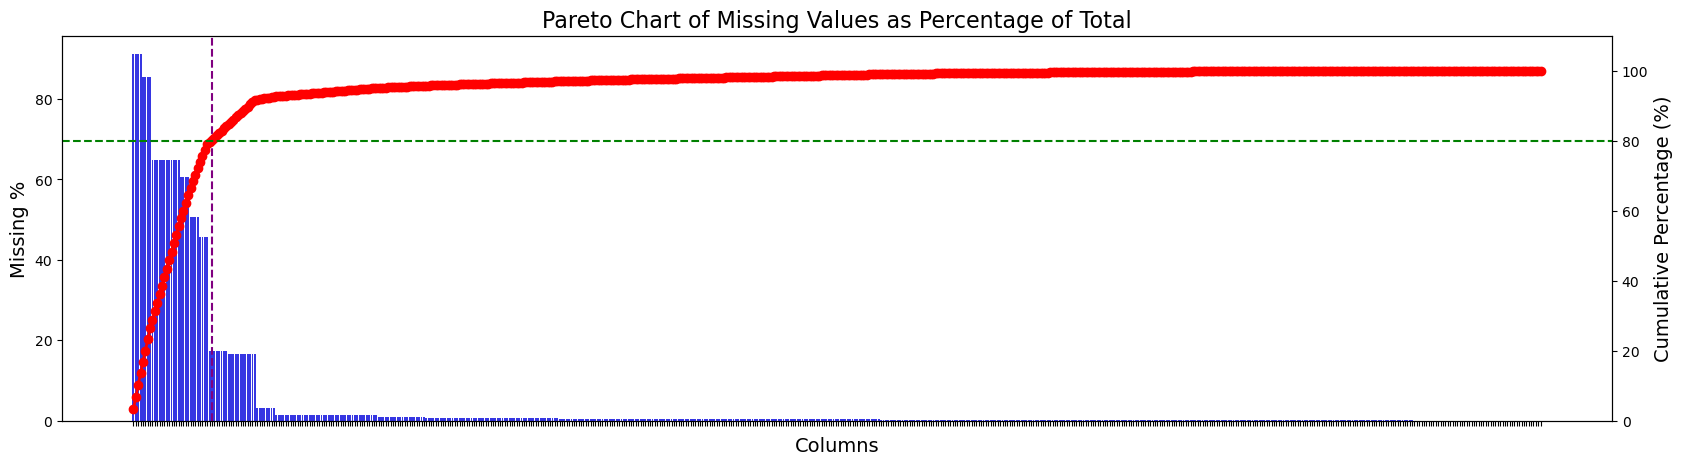

In [21]:
#Pareto Chart of Missing Values as a % of Total - USED IN PRESENTATION
# # Create a figure and axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot the bar chart for missing percentages
sns.barplot(x=pareto_data['Column'], y=pareto_data['Missing %'], alpha=0.9, ax=ax1, color='blue')
ax1.set_ylabel('Missing %', fontsize=14)
ax1.set_xlabel('Columns', fontsize=14)
ax1.set_title('Pareto Chart of Missing Values as Percentage of Total', fontsize=16)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(pareto_data['Column'], pareto_data['Cumulative Percentage'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)
ax2.set_ylim(0, 110)  # Ensure the percentage scale goes slightly above 100 for clarity

# Rotate x-axis labels for better readability
ax1.set_xticklabels([])

# Add horizontal line at 80% cumulative percentage
ax2.axhline(y=80, color='green', linestyle='--', linewidth=1.5)

# Find the column where the cumulative percentage exceeds 80%
threshold_column = pareto_data.loc[pareto_data['Cumulative Percentage'] > 80, 'Column'].iloc[0]

# Add vertical line at the threshold column
threshold_index = pareto_data[pareto_data['Column'] == threshold_column].index[0]
ax1.axvline(x=threshold_index, color='purple', linestyle='--', linewidth=1.5)

plt.show()

In [22]:
# Sort the DataFrame by 'Cumulative Percentage' in descending order
sorted_pareto_data = pareto_data.sort_values(by='Cumulative Percentage', ascending=False)

# Print the 'Missing %' and 'Cumulative Percentage' columns
print(sorted_pareto_data[['Missing %', 'Cumulative Percentage']])

     Missing %  Cumulative Percentage
591   0.000000             100.000000
564   0.000000             100.000000
562   0.000000             100.000000
561   0.000000             100.000000
560   0.000000             100.000000
..         ...                    ...
4    85.577537              16.822007
3    91.193363              13.625420
2    91.193363              10.219065
1    91.193363               6.812710
0    91.193363               3.406355

[592 rows x 2 columns]


Duplicate Row Treatment - Remove 0 Features

In [23]:
#Check for duplicate rows (there are 0)
df.duplicated().sum()

0

Zero Variance Treatment - No Action

In [24]:
#Zero volatility columns are those with 0 or near 0 mean and std
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
col2,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
col3,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
col4,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
col5,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
col587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
col588,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
col589,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
col590,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


Low Variability Investigation - No Action

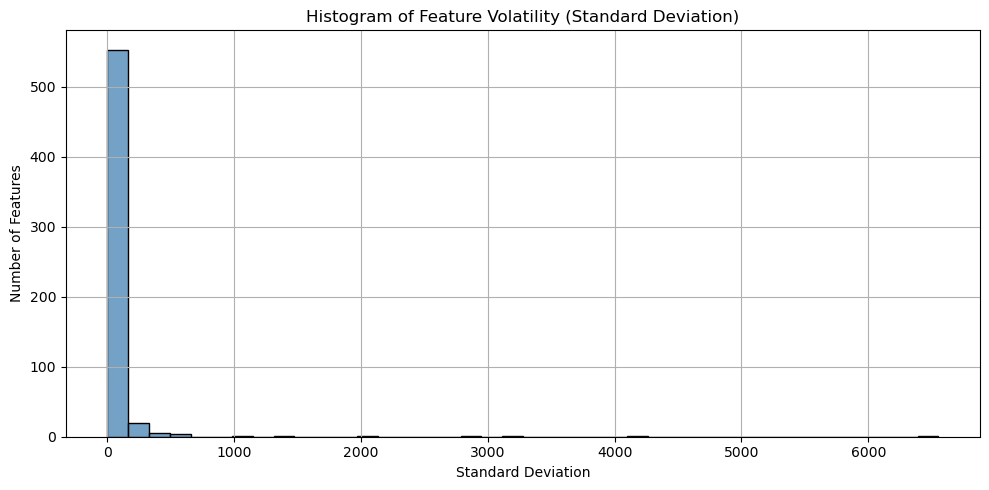

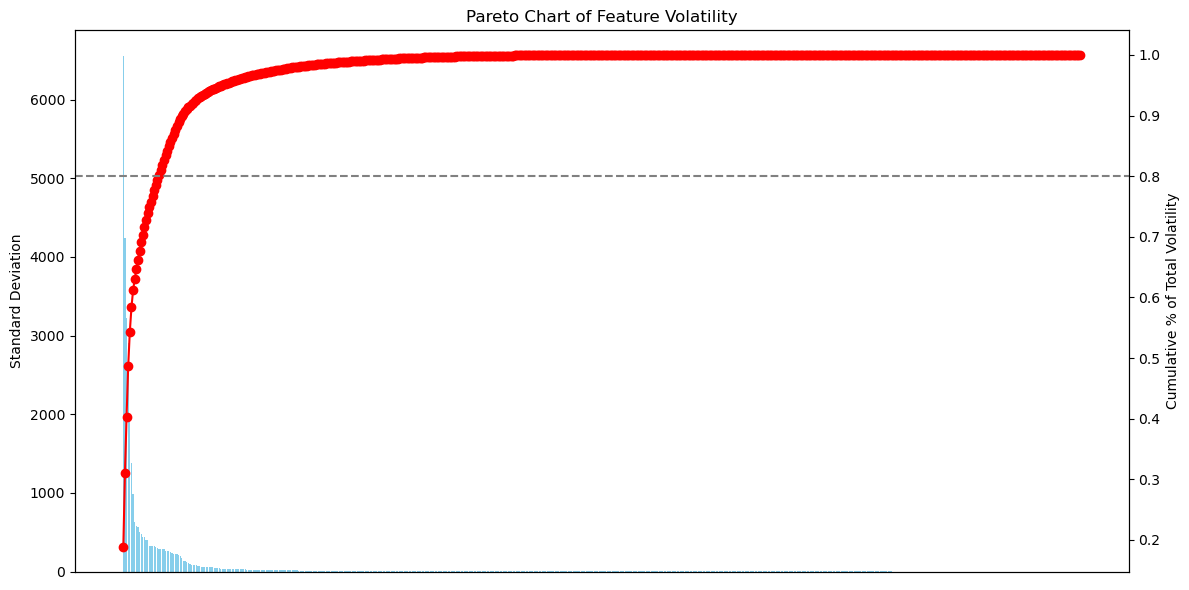

Number of features with low (but non-zero) volatility: 55
Percentage of features with low (but non-zero) volatility: 9.32%


In [25]:
# Calculate standard deviation (volatility) for each sensor column
std_devs = data.std().sort_values()

# ----------- Histogram of Feature Volatility -----------
plt.figure(figsize=(10, 5))
sns.histplot(std_devs, bins=40, kde=False, color='steelblue')
plt.title("Histogram of Feature Volatility (Standard Deviation)")
plt.xlabel("Standard Deviation")
plt.ylabel("Number of Features")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------- Pareto Chart of Feature Volatility -----------
# Sort in descending order for Pareto
sorted_std = std_devs[::-1]
cumulative = sorted_std.cumsum() / sorted_std.sum()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (standard deviation per column)
ax1.bar(sorted_std.index, sorted_std.values, color='skyblue')
ax1.set_ylabel('Standard Deviation')
ax1.set_xticks([])
ax1.set_title('Pareto Chart of Feature Volatility')

# Cumulative line plot
ax2 = ax1.twinx()
ax2.plot(cumulative.values, color='red', marker='o')
ax2.axhline(0.8, color='gray', linestyle='dashed')  # 80% line
ax2.set_ylabel('Cumulative % of Total Volatility')
plt.tight_layout()
plt.show()

# calculate low volatility features

# Calculate standard deviation excluding 'status' and 'timestamp'
std_devs = df.drop(columns=['status', 'timestamp']).std()
# Define a threshold for low volatility
low_volatility_threshold = 0.01

# Number of features with low but non-zero volatility
low_volatility_features = (std_devs > 0) & (std_devs < low_volatility_threshold)

# Calculate counts and percentages
num_low_volatility = low_volatility_features.sum()
percent_low_volatility = (num_low_volatility / len(std_devs)) * 100

print(f"Number of features with low (but non-zero) volatility: {num_low_volatility}")
print(f"Percentage of features with low (but non-zero) volatility: {percent_low_volatility:.2f}%")


Outlier Investigation - No Action


In [26]:
#note that the total outliers differs from ppt 1 because pp1 only removed zero volatility columns before calculating outliers; this version removes zero volatility AND >65% missing values. 
df_cleaned = data.copy()
# Calculate Z-scores
z_scores = (df_cleaned - df_cleaned.mean()) / df_cleaned.std()

# Define thresholds
thresholds = [3, 4]

for threshold in thresholds:
    # Identify outliers: where |Z| > threshold
    outliers = np.abs(z_scores) > threshold

    # Total outliers per row and count of rows with any outliers
    outliers_per_row = outliers.sum(axis=1)
    total_outlier_rows = (outliers_per_row > 0).sum()

    # Total outliers per column and count of columns with any outliers
    outliers_per_col = outliers.sum(axis=0)
    total_outlier_cols = (outliers_per_col > 0).sum()

    # Total outlier values in the dataset
    total_outliers = outliers.sum().sum()
    total_values = df_cleaned.size
    percent_outliers = (total_outliers / total_values) * 100

    # Print results
    print(f"\n--- Z-score threshold > {threshold} ---")
    print(f"Total rows with outliers: {total_outlier_rows} out of {df_cleaned.shape[0]} rows")
    print(f"Total columns with outliers: {total_outlier_cols} out of {df_cleaned.shape[1]} columns")
    print(f"Total outlier values: {total_outliers} out of {total_values} ({percent_outliers:.2f}%)")



--- Z-score threshold > 3 ---
Total rows with outliers: 1265 out of 1567 rows
Total columns with outliers: 440 out of 590 columns
Total outlier values: 6116 out of 924530 (0.66%)

--- Z-score threshold > 4 ---
Total rows with outliers: 762 out of 1567 rows
Total columns with outliers: 402 out of 590 columns
Total outlier values: 3258 out of 924530 (0.35%)


Correlation Investigation - No Action

In [27]:
#calculate standard deviation of column subsamples
print(f"Col1 Std: {data['col1'].std()}")
print(f"Col102 Std: {data['col102'].std()}")
print(f"Col64 Std: {data['col64'].std()}")

Col1 Std: 73.62178674853081
Col102 Std: 0.00022076237351255305
Col64 Std: 7.1198631082108985


In [28]:
data.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col58

Text(0.5, 1.0, 'Single Digit SD Feature - Example 2 (col64)')

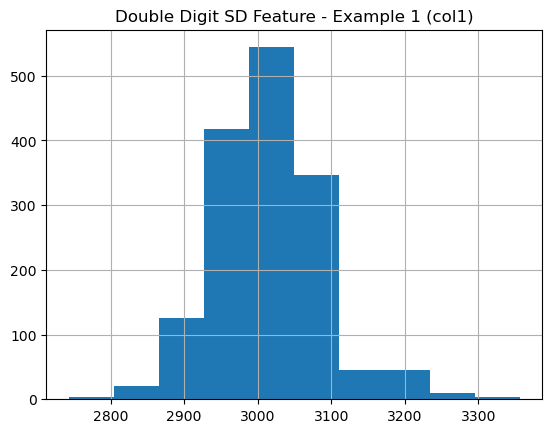

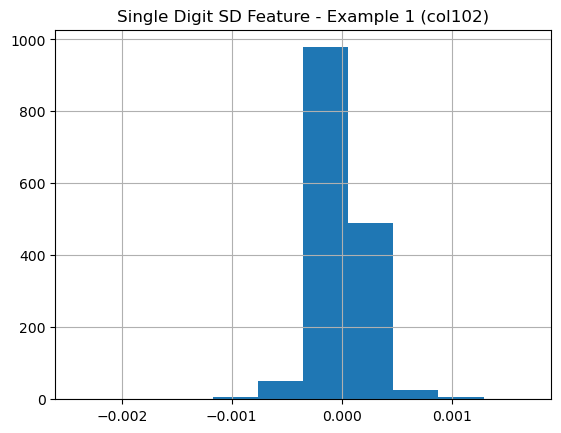

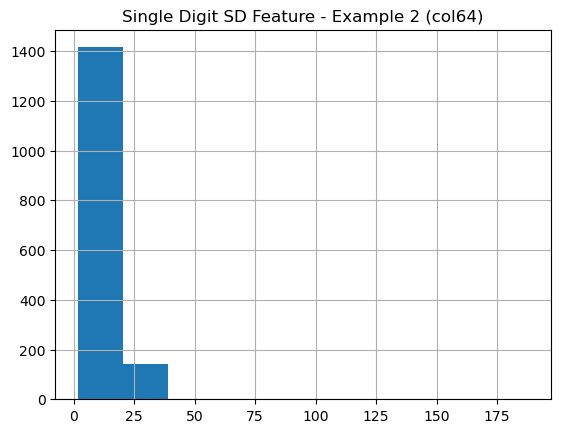

In [29]:
#Analyze histograms of a subsample of single digit SD vs double digit SD features to see if they are normally distributed
#double digit SD feature example
data[['col1']].hist()
plt.title('Double Digit SD Feature - Example 1 (col1)')

#single digit SD feature examples
data[['col102']].hist()
plt.title('Single Digit SD Feature - Example 1 (col102)')

data[['col64']].hist()
plt.title('Single Digit SD Feature - Example 2 (col64)')

['col163', 'col162', 'col298', 'col25', 'col297', 'col24', 'col160', 'col22', 'col161', 'col205', 'col141', 'col295']


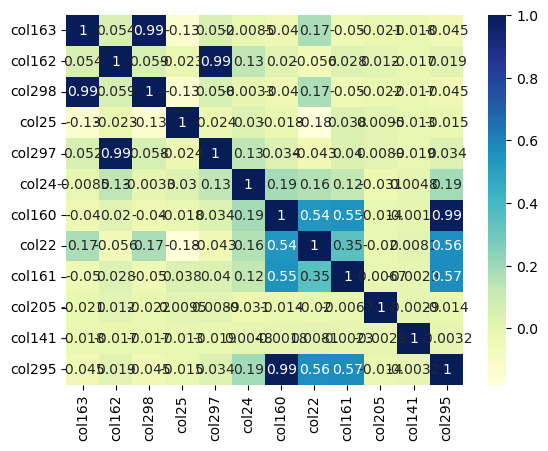

In [30]:
# Print the 12 columns with the highest standard deviation
top_12_std_cols = data.std().sort_values(ascending=False).head(12)
print(top_12_std_cols.index.tolist())

# Compute correlation matrix
corr_matrix_12= data[top_12_std_cols.index.tolist()].corr()

# Plot correlation heatmap
sns.heatmap(corr_matrix_12, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

['col4', 'col226', 'col159', 'col91', 'col512', 'col420', 'col500', 'col501', 'col68', 'col23']


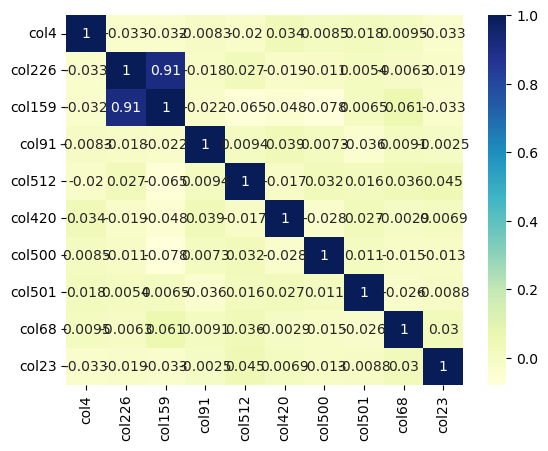

In [31]:
#print top standard deviation columns #12-22
std_sorted = data.std().sort_values(ascending=False)
top_12_22_std_cols = std_sorted.index[12:22].tolist()
print(top_12_22_std_cols)

# Plot correlation heatmap
corr_matrix_12_22 = data[top_12_22_std_cols].corr()
sns.heatmap(corr_matrix_12_22, cmap="YlGnBu", annot=True)
plt.show()

Lowest 10 double digit standard deviation columns:
col247    10.045084
col472    10.174117
col478    10.185026
col570    10.213294
col198    10.552162
col429    10.632730
col517    10.783880
col206    11.541083
col67     11.623078
col47     12.170315
dtype: float64


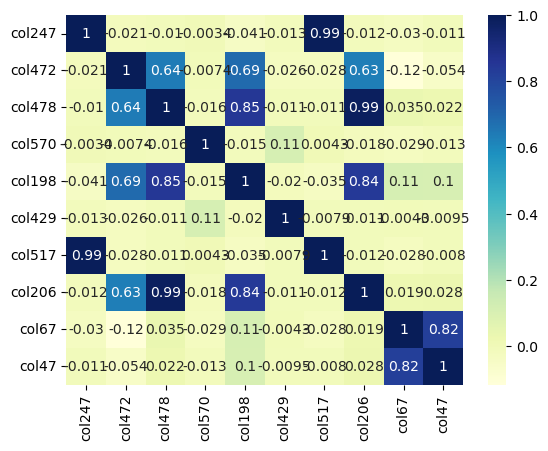

In [32]:
# Print the lowest 10 double digit standard deviation columns
# Find columns with double digit standard deviation (>=10 and <100)
double_digit_std = std_sorted[(std_sorted >= 10) & (std_sorted < 100)]
lowest_10_double_digit_std = double_digit_std[(double_digit_std >= 10) & (double_digit_std < 100)].sort_values().head(10)
print("Lowest 10 double digit standard deviation columns:")
print(lowest_10_double_digit_std)

#plot correlation heatmap of lowest 10 double digit standard deviation columns
corr_matrix_lowest_10_double_digit = data[lowest_10_double_digit_std.index].corr()
sns.heatmap(corr_matrix_lowest_10_double_digit, cmap="YlGnBu", annot=True)
plt.show()

In [33]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586,col58

Execute Train/Test Split

In [34]:
df = df.drop(columns=['timestamp'])

In [35]:
# Ensure the 'status' column is included in the split for stratification
df['status'] = labels['status']

# Perform the stratified split
train_data, test_data = train_test_split(
    df,
    test_size=0.2,
    stratify=df['status'],
    random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (1253, 591)
Test data shape: (314, 591)


Describe Train/Test Split Distributions


📊 Label Distribution (Counts):
        Full Data  Train Data  Test Data
status                                  
-1           1463        1170        293
 1            104          83         21


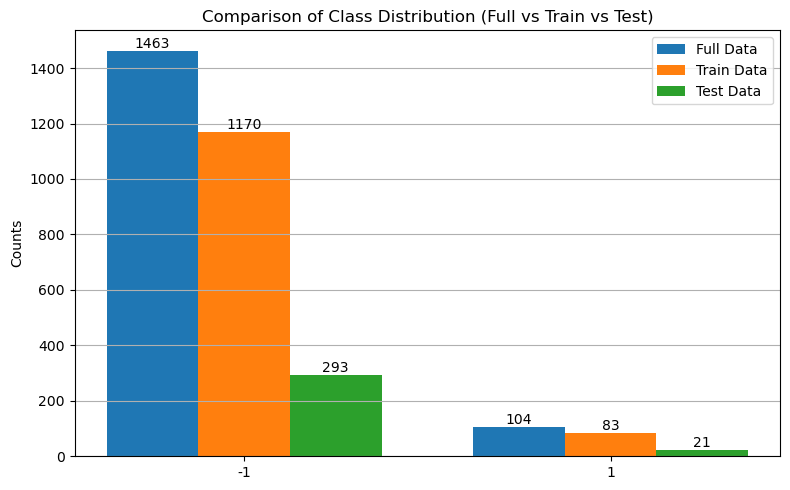

In [36]:
#summarize the distributions
full_counts = df['status'].value_counts().sort_index()
train_counts = train_data['status'].value_counts().sort_index()
test_counts = test_data['status'].value_counts().sort_index()

# Combine into a single table
distribution_table = pd.DataFrame({
    'Full Data': full_counts,
    'Train Data': train_counts,
    'Test Data': test_counts
})

print("\n📊 Label Distribution (Counts):")
print(distribution_table)

labels_list = distribution_table.index.tolist()
x = np.arange(len(labels_list))  # the label locations

width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width, distribution_table['Full Data'], width, label='Full Data')
rects2 = ax.bar(x, distribution_table['Train Data'], width, label='Train Data')
rects3 = ax.bar(x + width, distribution_table['Test Data'], width, label='Test Data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Comparison of Class Distribution (Full vs Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(labels_list)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)
    
plt.show()


In [37]:
data.shape, train_data.shape, test_data.shape

((1567, 590), (1253, 591), (314, 591))

In [38]:
total_missing_values

41951

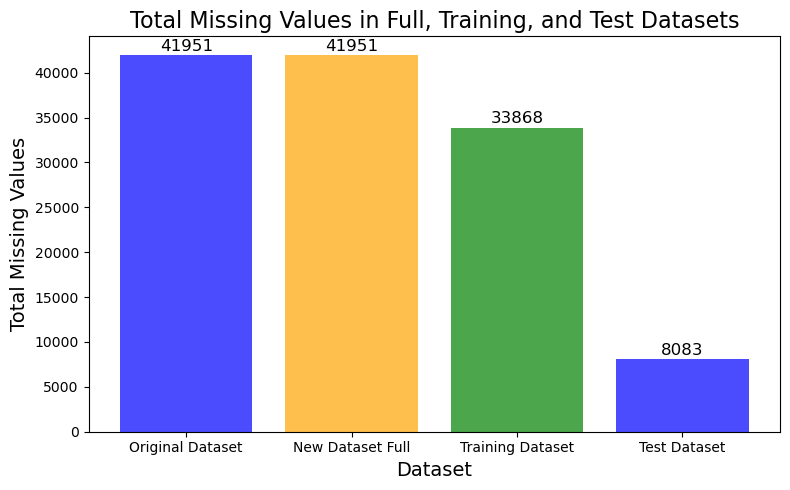

In [39]:
# Calculate the total number of missing values for each dataset
total_missing_full = data.isna().sum().sum()
total_missing_train = train_data.isna().sum().sum()
total_missing_test = test_data.isna().sum().sum()

# Create a bar plot
plt.figure(figsize=(8, 5))
datasets = ['Original Dataset', 'New Dataset Full', 'Training Dataset', 'Test Dataset']
missing_values = [total_missing_values, total_missing_full, total_missing_train, total_missing_test]

plt.bar(datasets, missing_values, color=['blue', 'orange', 'green'], alpha=0.7)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Total Missing Values', fontsize=14)
plt.title('Total Missing Values in Full, Training, and Test Datasets', fontsize=16)

# Add value labels above the bars
for i, value in enumerate(missing_values):
    plt.text(i, value + 500, str(value), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Implement K-Fold on Training Set

In [40]:
from sklearn.model_selection import StratifiedKFold

# Prepare features and target
X = train_data.drop(columns=['status'])
y = train_data['status']

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example: print the number of samples in each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"Fold {fold}:")
    print(f"  Train size: {len(train_idx)}")
    print(f"  Validation size: {len(val_idx)}")

Fold 1:
  Train size: 1002
  Validation size: 251
Fold 2:
  Train size: 1002
  Validation size: 251
Fold 3:
  Train size: 1002
  Validation size: 251
Fold 4:
  Train size: 1003
  Validation size: 250
Fold 5:
  Train size: 1003
  Validation size: 250


Zero Variance Removal - 122 & 116 Removed

In [41]:
# ...existing code...
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Identify zero variance columns in this fold's training set
    zero_var_cols = X_train.columns[X_train.var() == 0].tolist()
    print(f"Fold {fold}: Dropping {len(zero_var_cols)} zero-variance columns: {zero_var_cols}")

    # Drop zero variance columns from both train and validation sets
    X_train = X_train.drop(columns=zero_var_cols)
    X_val = X_val.drop(columns=zero_var_cols)

    # ...continue with your processing (e.g., imputation, SMOTE, etc.)...
# ...existing code...

Fold 1: Dropping 122 zero-variance columns: ['col6', 'col14', 'col43', 'col50', 'col53', 'col70', 'col75', 'col98', 'col142', 'col150', 'col179', 'col180', 'col187', 'col190', 'col191', 'col192', 'col193', 'col194', 'col195', 'col207', 'col210', 'col227', 'col230', 'col231', 'col232', 'col233', 'col234', 'col235', 'col236', 'col237', 'col238', 'col241', 'col242', 'col243', 'col244', 'col257', 'col258', 'col259', 'col260', 'col261', 'col262', 'col263', 'col264', 'col265', 'col266', 'col267', 'col277', 'col285', 'col314', 'col315', 'col316', 'col323', 'col326', 'col327', 'col328', 'col329', 'col330', 'col331', 'col343', 'col348', 'col365', 'col370', 'col371', 'col372', 'col373', 'col374', 'col375', 'col376', 'col379', 'col380', 'col381', 'col382', 'col395', 'col396', 'col397', 'col398', 'col399', 'col400', 'col401', 'col402', 'col403', 'col404', 'col405', 'col415', 'col423', 'col450', 'col451', 'col452', 'col459', 'col462', 'col463', 'col464', 'col465', 'col466', 'col467', 'col479', 'col

Missing Values Removal - 24 Removed

In [42]:
# ...existing code...
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Identify columns with >60% missing values in this fold's training set
    missing_pct = X_train.isna().mean() * 100
    cols_to_drop_missing = missing_pct[missing_pct > 60].index.tolist()
    print(f"Fold {fold}: Dropping {len(cols_to_drop_missing)} columns with >60% missing values: {cols_to_drop_missing}")

    # Drop these columns from both train and validation sets
    X_train = X_train.drop(columns=cols_to_drop_missing)
    X_val = X_val.drop(columns=cols_to_drop_missing)

    # ...continue with your processing (e.g., imputation, SMOTE, etc.)...
# ...existing code...

Fold 1: Dropping 24 columns with >60% missing values: ['col86', 'col110', 'col111', 'col112', 'col158', 'col159', 'col221', 'col245', 'col246', 'col247', 'col293', 'col294', 'col359', 'col383', 'col384', 'col385', 'col493', 'col517', 'col518', 'col519', 'col579', 'col580', 'col581', 'col582']
Fold 2: Dropping 24 columns with >60% missing values: ['col86', 'col110', 'col111', 'col112', 'col158', 'col159', 'col221', 'col245', 'col246', 'col247', 'col293', 'col294', 'col359', 'col383', 'col384', 'col385', 'col493', 'col517', 'col518', 'col519', 'col579', 'col580', 'col581', 'col582']
Fold 3: Dropping 24 columns with >60% missing values: ['col86', 'col110', 'col111', 'col112', 'col158', 'col159', 'col221', 'col245', 'col246', 'col247', 'col293', 'col294', 'col359', 'col383', 'col384', 'col385', 'col493', 'col517', 'col518', 'col519', 'col579', 'col580', 'col581', 'col582']
Fold 4: Dropping 24 columns with >60% missing values: ['col86', 'col110', 'col111', 'col112', 'col158', 'col159', 'col

Scale Train Data

In [43]:
#scale the data using robust scaler
from sklearn.preprocessing import RobustScaler
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Scale using RobustScaler (fit on train, transform both)
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)

    # Now X_train_scaled and X_val_scaled are ready for imputation, SMOTE, etc.


Impute Missing Values & Confirm Imputation Method

In [44]:
# Impute each fold using the mean, then scale using RobustScaler
mean_imputed_folds_scaled = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Mean imputation
    X_train_mean = X_train.fillna(X_train.mean())
    X_val_mean = X_val.fillna(X_train.mean())  # Use train mean for validation

    # Scale using RobustScaler (fit on train, transform both)
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_mean), columns=X_train_mean.columns, index=X_train_mean.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val_mean), columns=X_val_mean.columns, index=X_val_mean.index)

    mean_imputed_folds_scaled.append({
        'fold': fold,
        'X_train_mean_scaled': X_train_scaled,
        'y_train': y_train,
        'X_val_mean_scaled': X_val_scaled,
        'y_val': y_val
    })

In [45]:
from sklearn.impute import KNNImputer

# Store KNN-imputed training and validation folds (on scaled data)
knn_imputed_folds_scaled = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Scale using RobustScaler (fit on train, transform both)
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)

    # KNN imputation on scaled training and validation sets
    knn_imputer = KNNImputer(n_neighbors=5)
    X_train_knn_scaled = pd.DataFrame(knn_imputer.fit_transform(X_train_scaled), columns=X_train_scaled.columns, index=X_train_scaled.index)
    X_val_knn_scaled = pd.DataFrame(knn_imputer.transform(X_val_scaled), columns=X_val_scaled.columns, index=X_val_scaled.index)

    knn_imputed_folds_scaled.append({
        'fold': fold,
        'X_train_knn_scaled': X_train_knn_scaled,
        'y_train': y_train,
        'X_val_knn_scaled': X_val_knn_scaled,
        'y_val': y_val
    })

In [ ]:
# MICE imputation (IterativeImputer) on each kfold training and validation set using scaled data, with 1 iteration
mice_imputed_folds_scaled = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Scale using RobustScaler (fit on train, transform both)
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)

    # MICE imputation with 1 iteration
    mice_imputer = IterativeImputer(random_state=42, max_iter=5)
    X_train_mice = pd.DataFrame(mice_imputer.fit_transform(X_train_scaled), columns=X_train_scaled.columns, index=X_train_scaled.index)
    X_val_mice = pd.DataFrame(mice_imputer.transform(X_val_scaled), columns=X_val_scaled.columns, index=X_val_scaled.index)

    mice_imputed_folds_scaled.append({
        'fold': fold,
        'X_train_mice': X_train_mice,
        'y_train': y_train,
        'X_val_mice': X_val_mice,
        'y_val': y_val
    })

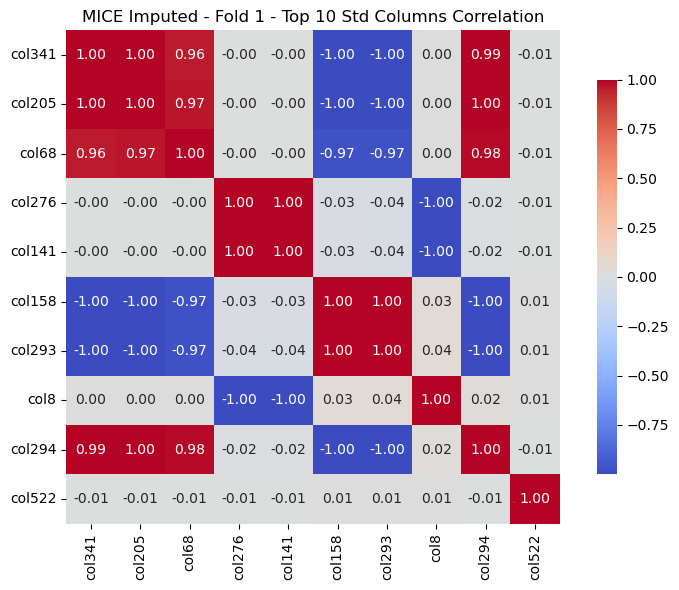

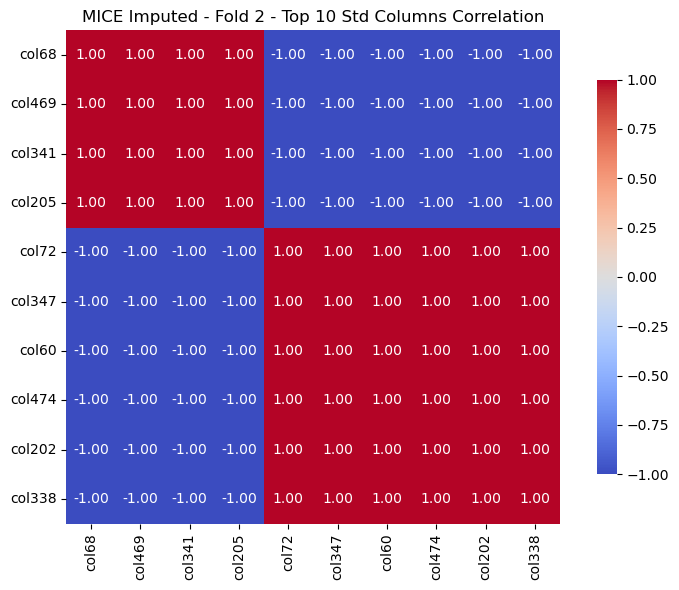

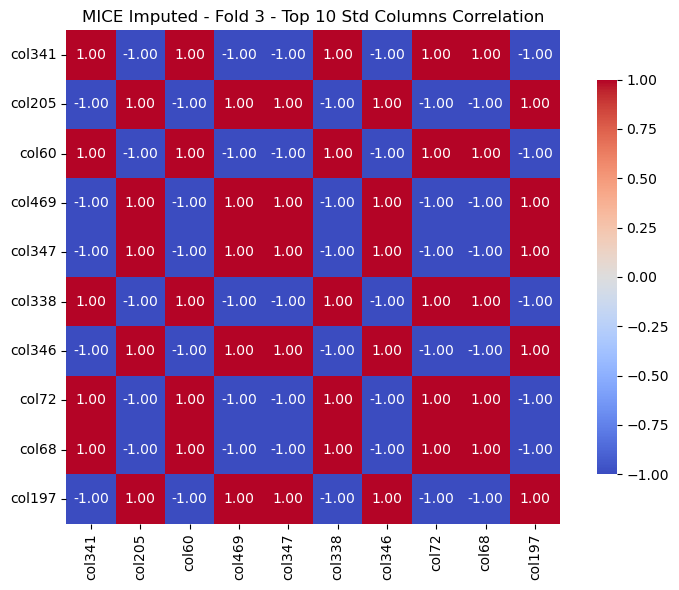

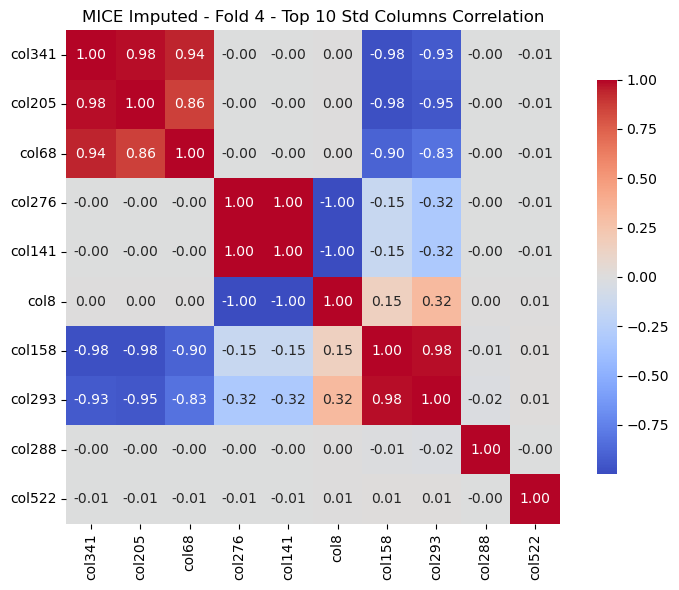

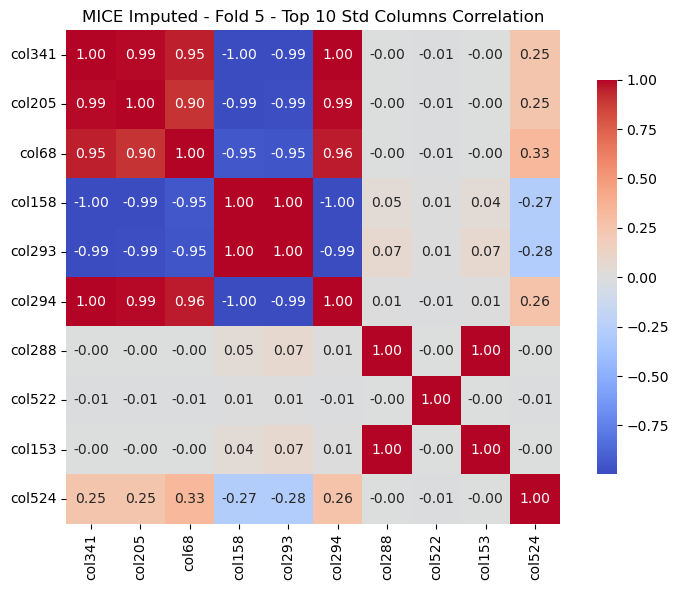

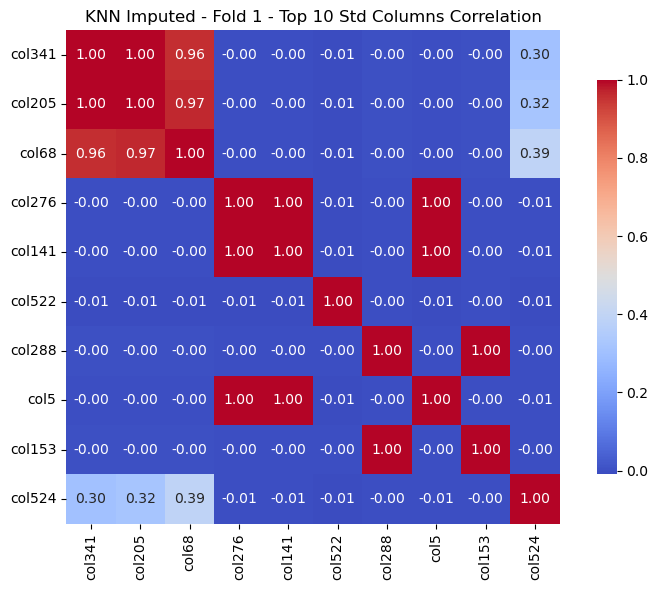

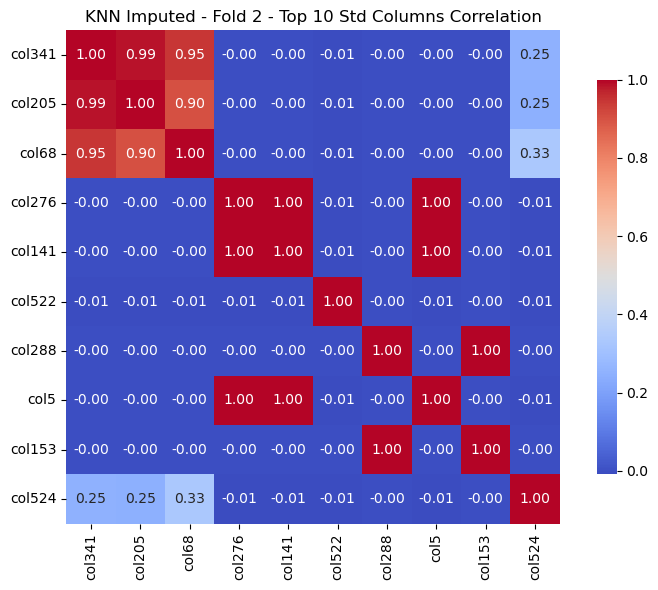

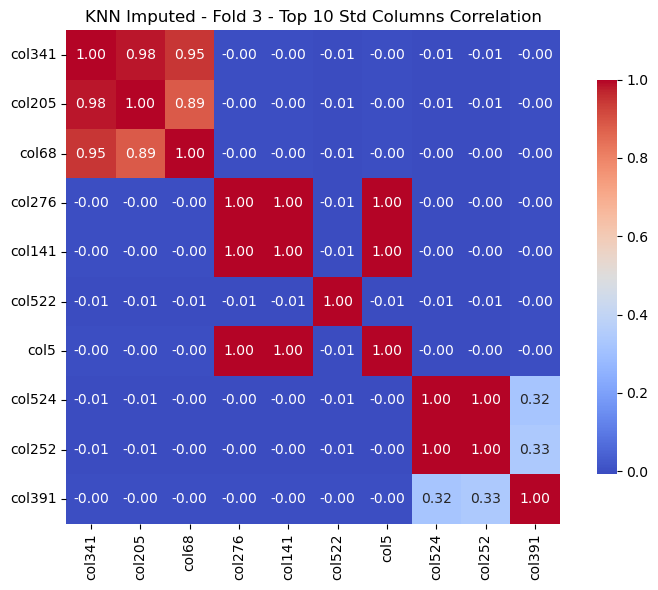

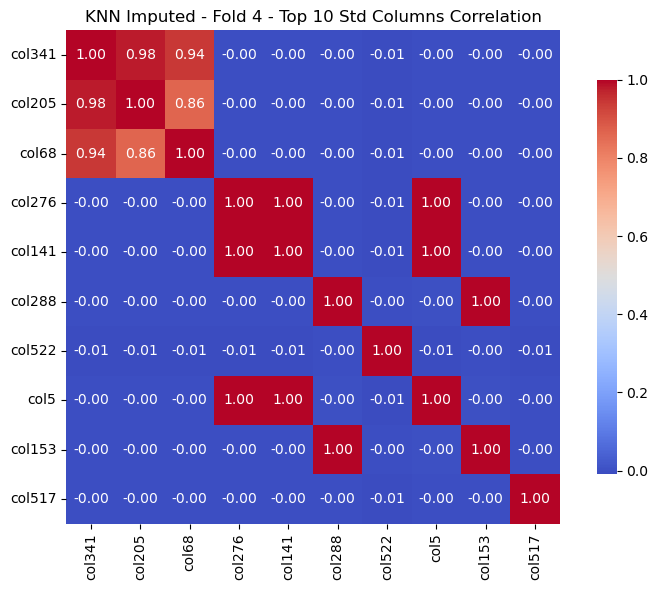

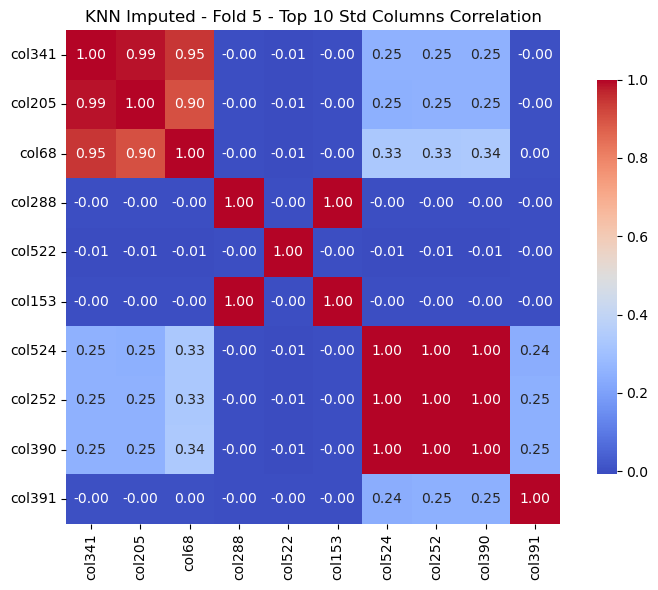

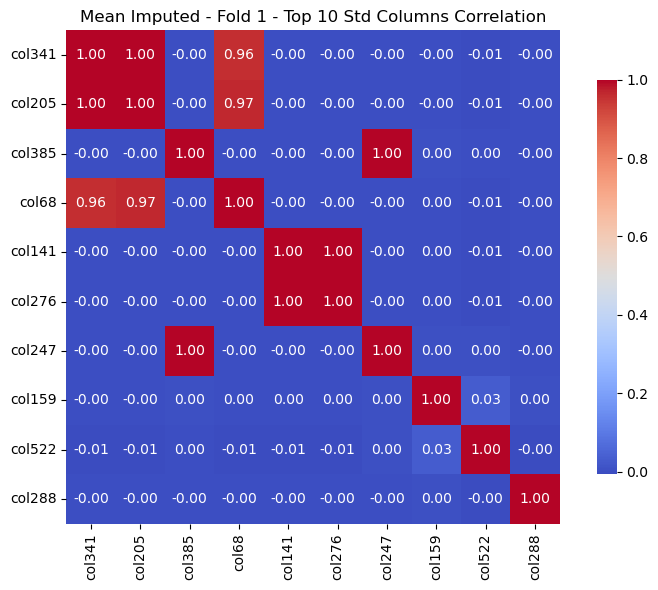

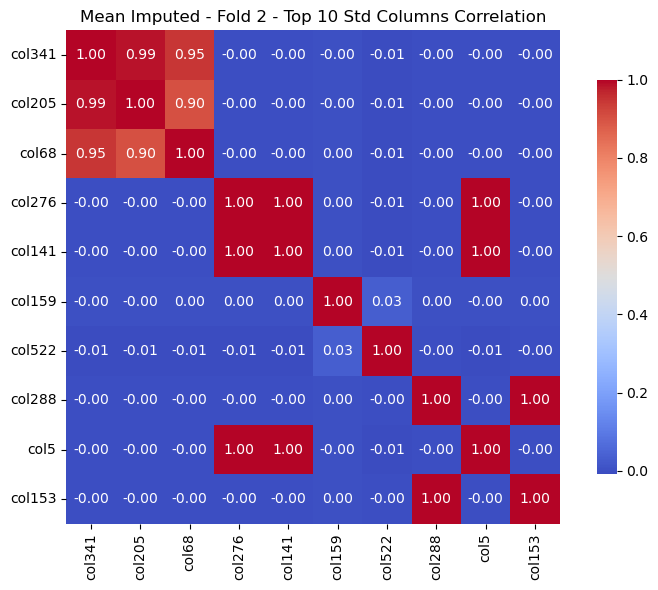

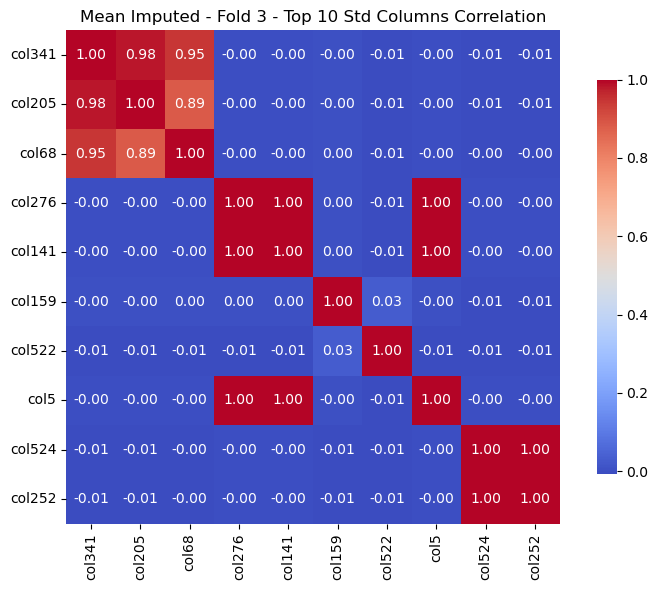

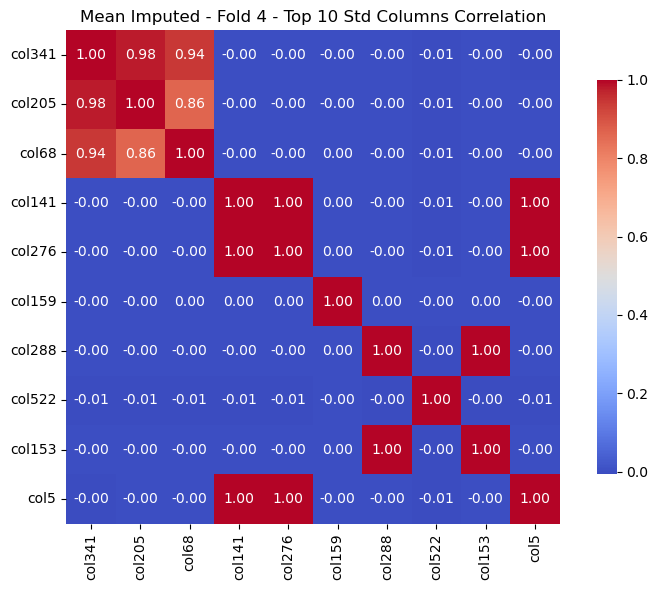

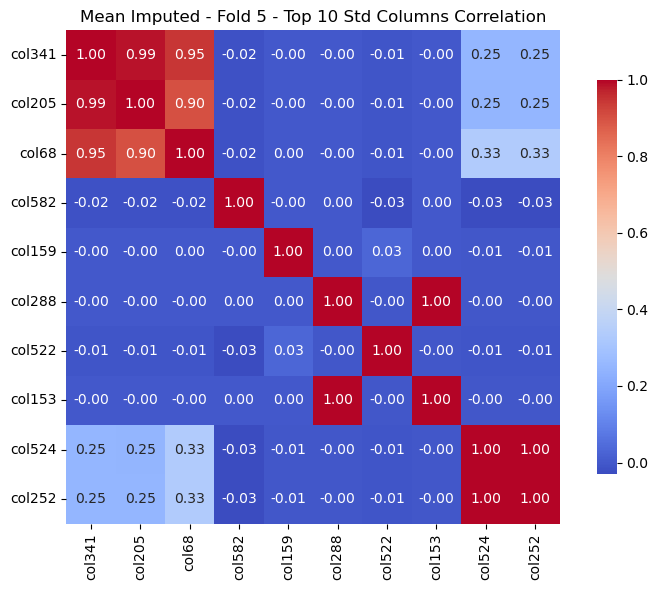

In [ ]:
# For each imputed dataset, plot correlation heatmaps of the top 10 standard deviation columns for each fold

def plot_top10_corr_heatmaps(imputed_folds_scaled, dataset_name):
    for fold_data in imputed_folds_scaled:
        fold = fold_data['fold']
        X_train = fold_data[[k for k in fold_data if k.startswith('X_train')][0]]  # get X_train for this imputation
        # Get top 10 columns by std
        top10_cols = X_train.std().nlargest(10).index
        corr_matrix = X_train[top10_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
        plt.title(f"{dataset_name} - Fold {fold} - Top 10 Std Columns Correlation")
        plt.tight_layout()
        plt.show()

plot_top10_corr_heatmaps(mice_imputed_folds_scaled, "MICE Imputed")
plot_top10_corr_heatmaps(knn_imputed_folds_scaled, "KNN Imputed")
plot_top10_corr_heatmaps(mean_imputed_folds_scaled, "Mean Imputed")

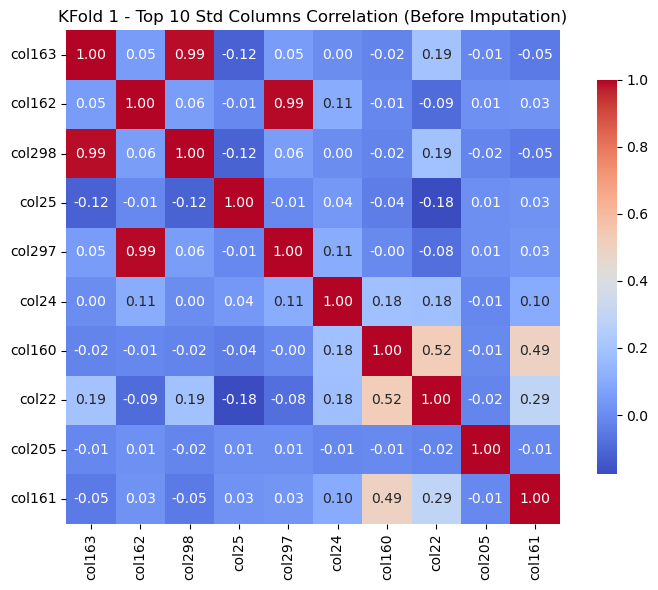

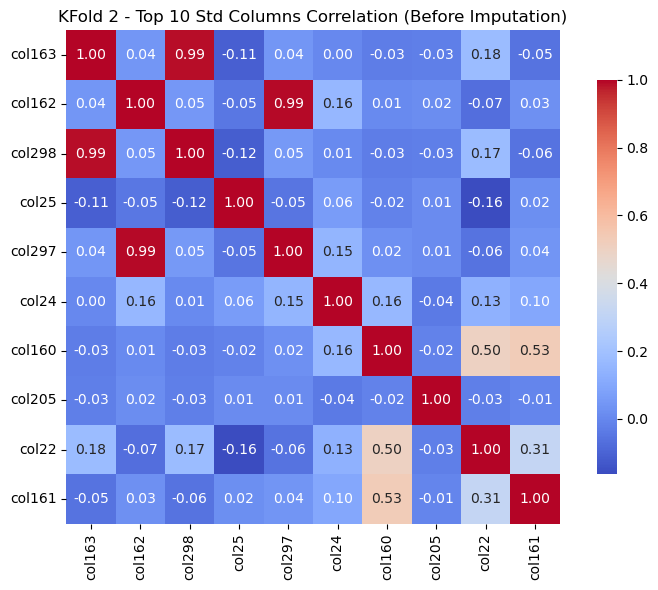

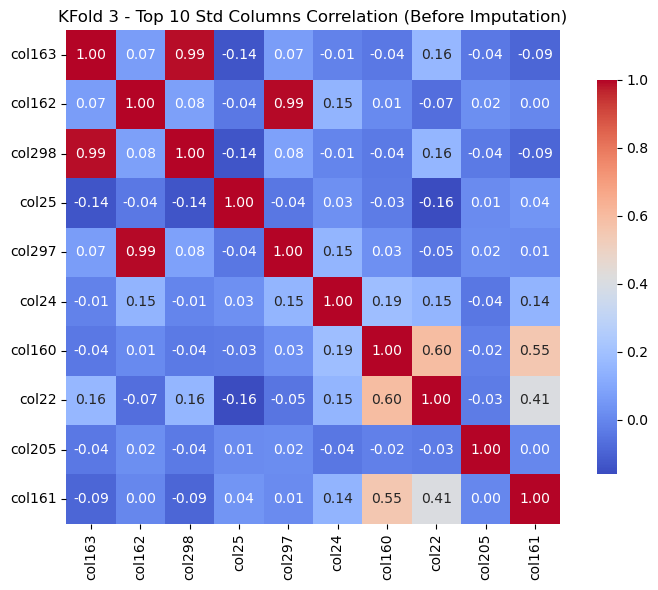

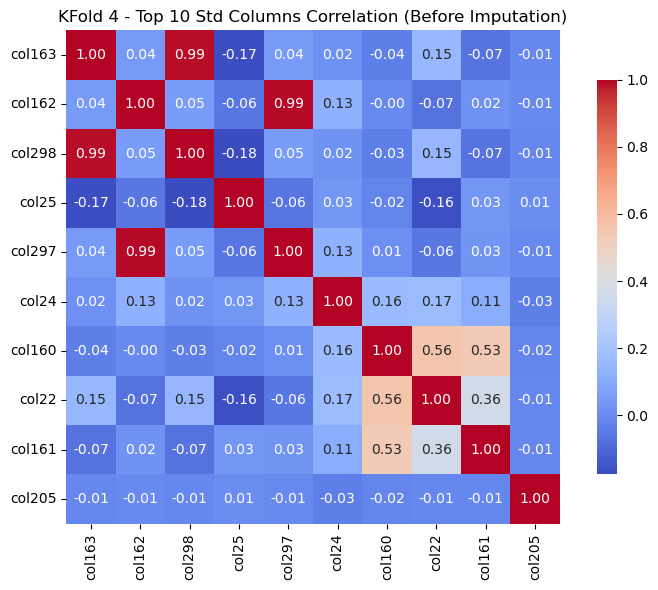

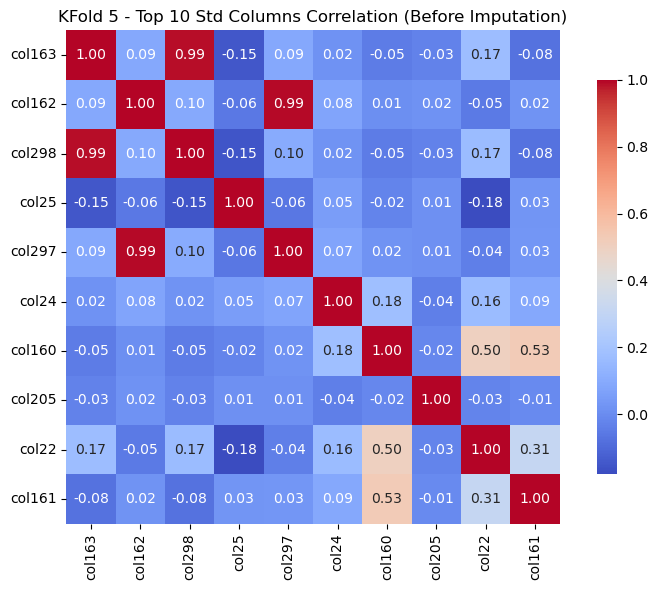

In [ ]:
# Plot correlation heatmaps of the top 10 standard deviation columns for each k-fold before imputation

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train = X.iloc[train_idx]
    # Get top 10 columns by standard deviation in this fold's training set
    top10_cols = X_train.std().nlargest(10).index
    corr_matrix = X_train[top10_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
    plt.title(f"KFold {fold} - Top 10 Std Columns Correlation (Before Imputation)")
    plt.tight_layout()
    plt.show()

Confirm PCA Should Not Be Applied

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target
X_knn = knn_imputed_w_outliers.drop(columns=['status'])
y_knn = knn_imputed_w_outliers['status']

# Fit linear regression model
linreg = LinearRegression()
linreg.fit(X_knn, y_knn)

# Predict on the same data (since this is just for linearity check)
y_pred = linreg.predict(X_knn)

# Calculate least square error (mean squared error)
mse = mean_squared_error(y_knn, y_pred)
print(f"Least Square Error (MSE) on KNN-imputed data: {mse:.4f}")

# Interpretation
if mse < 0.1:
    print("Low error: The dataset is likely linear in nature.")
else:
    print("High error: The dataset is likely non-linear in nature.")

In [ ]:
# Scatterplot of actual vs predicted values for the linear regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_knn, y_pred, alpha=0.5, color='blue')
plt.xlabel('Actual Status')
plt.ylabel('Predicted Status')
plt.title('Actual vs Predicted Status (Linear Regression on KNN-imputed Data)')
plt.grid(True)
plt.tight_layout()
plt.show()

Investigate Correlated Values of Train Dataset After Imputation - No Action

In [ ]:
# Compute the correlation matrix for train_data_knn (excluding 'status' if present)
corr_matrix_knn = knn_imputed_w_outliers.drop(columns=['status'], errors='ignore').corr()

# Select the upper triangle of the correlation matrix
upper_tri = corr_matrix_knn.where(np.triu(np.ones(corr_matrix_knn.shape), k=1).astype(bool))

# Find pairs with correlation higher than 0.7
high_corr_pairs = upper_tri.stack()[abs(upper_tri.stack()) > 0.7].sort_values(ascending=False)

print("Correlation pairs with absolute value > 0.7:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(high_corr_pairs)

In [ ]:
high_corr_pairs.to_clipboard()

Select features using Boruta on k-fold train sets

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

boruta_features_per_fold = []

for fold_data in knn_imputed_folds_scaled:
    fold = fold_data['fold']
    X_train = fold_data['X_train_knn_scaled']
    y_train = fold_data['y_train']

    rf = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=40)
    boruta = BorutaPy(rf, n_estimators='auto', max_iter=100, random_state=40, verbose=0)
    boruta.fit(X_train.values, y_train.values)

    selected_features = X_train.columns[boruta.support_].tolist()
    tentative_features = X_train.columns[boruta.support_weak_].tolist()

    print(f"Fold {fold}:")
    print(f"  Selected features: {selected_features}")
    print(f"  Tentative features: {tentative_features}")
    print(f"  Total selected + tentative: {len(selected_features) + len(tentative_features)}")

    boruta_features_per_fold.append({
        'fold': fold,
        'selected_features': selected_features,
        'tentative_features': tentative_features
    })

Fold 1:
  Selected features: ['col27', 'col39', 'col60', 'col65', 'col66', 'col100', 'col104', 'col133', 'col154', 'col206', 'col268', 'col342', 'col427', 'col478', 'col540', 'col563']
  Tentative features: ['col3', 'col122']
  Total selected + tentative: 18
Fold 2:
  Selected features: ['col60', 'col65', 'col66', 'col72', 'col100', 'col104', 'col154', 'col427', 'col442', 'col540', 'col563']
  Tentative features: ['col64', 'col476']
  Total selected + tentative: 13
Fold 3:
  Selected features: ['col17', 'col23', 'col60', 'col65', 'col100', 'col104', 'col122', 'col133', 'col563', 'col575']
  Tentative features: ['col26', 'col39', 'col66']
  Total selected + tentative: 13
Fold 4:
  Selected features: ['col39', 'col65', 'col66', 'col104', 'col122', 'col133', 'col154', 'col427', 'col442', 'col476', 'col563', 'col575']
  Tentative features: ['col124', 'col171']
  Total selected + tentative: 14
Fold 5:
  Selected features: ['col3', 'col39', 'col60', 'col65', 'col66', 'col104', 'col206', 'col

Choose features that appeared as EITHER selected OR tentative in at least 3 out of 5 folds - No Current Action

In [ ]:
from collections import Counter

# Combine selected and tentative features from all folds
all_selected_and_tentative = []
for fold_result in boruta_features_per_fold:
    all_selected_and_tentative.extend(fold_result['selected_features'])
    all_selected_and_tentative.extend(fold_result['tentative_features'])

# Count occurrences
feature_counts_all = Counter(all_selected_and_tentative)

# List features that appeared in at least 3 out of 5 folds
features_in_3_or_more = [feature for feature, count in feature_counts_all.items() if count >= 3]
print("Selected or tentative Boruta features in at least 3 out of 5 folds:", features_in_3_or_more)
print(f"Total features selected or tentative in at least 3 folds: {len(features_in_3_or_more)}")

Selected or tentative Boruta features in at least 3 out of 5 folds: ['col39', 'col60', 'col65', 'col66', 'col100', 'col104', 'col133', 'col154', 'col427', 'col540', 'col563', 'col122', 'col442', 'col575']
Total features selected or tentative in at least 3 folds: 14


How many collinear pairs are part of the boruta selected features? - No Action

In [ ]:
# Calculate high_corr_pairs from the concatenated KNN-imputed training folds
# Concatenate all X_train_knn_scaled from knn_imputed_folds_scaled
all_X_train_knn_scaled = pd.concat([fold_data['X_train_knn_scaled'] for fold_data in knn_imputed_folds_scaled], axis=0)

# Compute correlation matrix (excluding 'status' if present)
corr_matrix_knn = all_X_train_knn_scaled.corr()
upper_tri = corr_matrix_knn.where(np.triu(np.ones(corr_matrix_knn.shape), k=1).astype(bool))
high_corr_pairs = upper_tri.stack()[abs(upper_tri.stack()) > 0.7].sort_values(ascending=False)

# Now your original code will work:
collinear_pairs_in_selected = [
    (col1, col2, corr)
    for (col1, col2), corr in high_corr_pairs.items()
    if col1 in features_in_3_or_more and col2 in features_in_3_or_more
]

print(f"Number of collinear pairs in features_in_3_or_more: {len(collinear_pairs_in_selected)}")
for col1, col2, corr in collinear_pairs_in_selected:
    print(f"{col1} - {col2}: correlation = {corr:.2f}")

Number of collinear pairs in features_in_3_or_more: 2
col154 - col427: correlation = 1.00
col65 - col66: correlation = 0.85


Notes of Interest: two pairs among the 13 are collinear; one pair is .85 and one is .99. The previously-ranBoruta on the full 80% also came up with 13 selected features (plus addl tentative features which apparently i didn't write down). Of the 13 selected features, 10 are the same features as the k-fold selected features. This is good and as Tilo suggested it should turn out. 


Balance Each Fold

In [ ]:
##DEFINE CURRENT DISTRIBUTION OF CLASSES IN THE ORIGINAL IMPUTED DATASET AND EACH FOLD
# # Print class distribution of the 'status' column in each fold of knn_imputed_folds_scaled
for fold_data in knn_imputed_folds_scaled:
    fold = fold_data['fold']
    y_train = fold_data['y_train']
    y_val = fold_data['y_val']
    print(f"Fold {fold}:")
    print("  Train class distribution:")
    print(y_train.value_counts())
    print("  Validation class distribution:")
    print(y_val.value_counts())

Fold 1:
  Train class distribution:
status
-1    936
 1     66
Name: count, dtype: int64
  Validation class distribution:
status
-1    234
 1     17
Name: count, dtype: int64
Fold 2:
  Train class distribution:
status
-1    936
 1     66
Name: count, dtype: int64
  Validation class distribution:
status
-1    234
 1     17
Name: count, dtype: int64
Fold 3:
  Train class distribution:
status
-1    936
 1     66
Name: count, dtype: int64
  Validation class distribution:
status
-1    234
 1     17
Name: count, dtype: int64
Fold 4:
  Train class distribution:
status
-1    936
 1     67
Name: count, dtype: int64
  Validation class distribution:
status
-1    234
 1     16
Name: count, dtype: int64
Fold 5:
  Train class distribution:
status
-1    936
 1     67
Name: count, dtype: int64
  Validation class distribution:
status
-1    234
 1     16
Name: count, dtype: int64


In [ ]:
##INITIALIZE SMOTE BALANCING ON EACH FOLD OF THE KNN IMPUTED DATASET
from imblearn.over_sampling import SMOTE

# Prepare to store SMOTE-balanced folds
smote_balanced_folds = []

for fold_data in knn_imputed_folds_scaled:
    fold = fold_data['fold']
    X_train = fold_data['X_train_knn_scaled']
    y_train = fold_data['y_train']
    X_val = fold_data['X_val_knn_scaled']
    y_val = fold_data['y_val']

    # Apply SMOTE to the training set only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    smote_balanced_folds.append({
        'fold': fold,
        'X_train_smote': pd.DataFrame(X_train_smote, columns=X_train.columns),
        'y_train_smote': y_train_smote,
        'X_val': X_val,
        'y_val': y_val
    })

print(f"SMOTE balancing complete for {len(smote_balanced_folds)} folds.")

c:\Users\rebek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rebek\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\rebek\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rebek\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\rebek\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

SMOTE balancing complete for 5 folds.


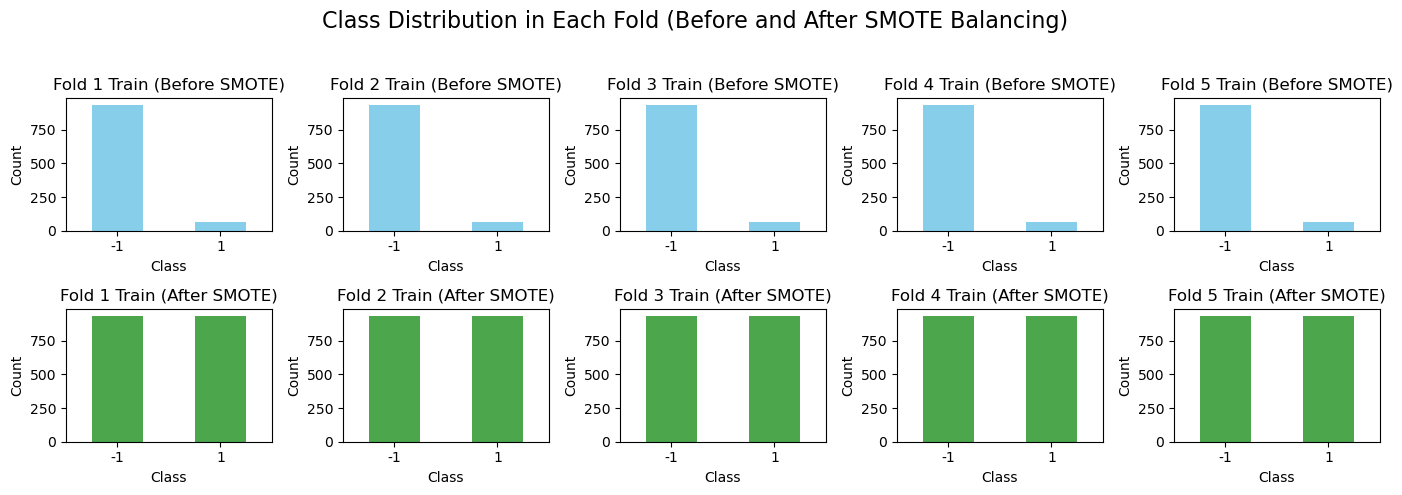

In [ ]:
#HISTOGRAMS. VALIDATION DATA IS NOT BALANCED, ONLY TRAINING DATA IS BALANCED
import matplotlib.pyplot as plt

# Plot class distribution before SMOTE balancing
plt.figure(figsize=(14, 5))
plt.suptitle("Class Distribution in Each Fold (Before and After SMOTE Balancing)", fontsize=16)

# Before SMOTE
for i, fold_data in enumerate(knn_imputed_folds_scaled, 1):
    y_train = fold_data['y_train']
    plt.subplot(2, len(knn_imputed_folds_scaled), i)
    y_train.value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Fold {i} Train (Before SMOTE)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

# After SMOTE
for i, fold_data in enumerate(smote_balanced_folds, 1):
    y_train_smote = fold_data['y_train_smote']
    plt.subplot(2, len(smote_balanced_folds), len(smote_balanced_folds) + i)
    y_train_smote.value_counts().sort_index().plot(kind='bar', color='green', alpha=0.7)
    plt.title(f'Fold {i} Train (After SMOTE)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Print class distribution in each fold after SMOTE balancing
for fold_data in smote_balanced_folds:
    fold = fold_data['fold']
    y_train_smote = fold_data['y_train_smote']
    print(f"Fold {fold} (After SMOTE):")
    print(y_train_smote.value_counts())
    print()

Fold 1 (After SMOTE):
status
-1    936
 1    936
Name: count, dtype: int64

Fold 2 (After SMOTE):
status
-1    936
 1    936
Name: count, dtype: int64

Fold 3 (After SMOTE):
status
-1    936
 1    936
Name: count, dtype: int64

Fold 4 (After SMOTE):
status
-1    936
 1    936
Name: count, dtype: int64

Fold 5 (After SMOTE):
status
-1    936
 1    936
Name: count, dtype: int64



Run Random Forest on K-Fold Training Sets and Validation Sets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_boruta_results = []

for fold, fold_data in enumerate(smote_balanced_folds, 1):
    # Get Boruta-selected features for this fold
    combo_features = boruta_features_per_fold[fold - 1]['selected_features'] + boruta_features_per_fold[fold - 1]['tentative_features']
    
    # Subset train and validation sets to Boruta-selected features
    X_train = fold_data['X_train_smote'][combo_features]
    y_train = fold_data['y_train_smote']
    X_val = fold_data['X_val'][combo_features]
    y_val = fold_data['y_val']

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Predict on validation set
    y_pred = rf.predict(X_val)

    # Calculate accuracy and print classification report
    acc = accuracy_score(y_val, y_pred)
    print(f"\nFold {fold} (Boruta features) - Validation Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred, digits=4))

    rf_boruta_results.append({
        'fold': fold,
        'accuracy': acc,
        'classification_report': classification_report(y_val, y_pred, digits=4, output_dict=True)
    })


Fold 1 (Boruta features) - Validation Accuracy: 0.8685
              precision    recall  f1-score   support

          -1     0.9467    0.9103    0.9281       234
           1     0.1923    0.2941    0.2326        17

    accuracy                         0.8685       251
   macro avg     0.5695    0.6022    0.5803       251
weighted avg     0.8956    0.8685    0.8810       251


Fold 2 (Boruta features) - Validation Accuracy: 0.8486
              precision    recall  f1-score   support

          -1     0.9414    0.8932    0.9167       234
           1     0.1379    0.2353    0.1739        17

    accuracy                         0.8486       251
   macro avg     0.5397    0.5642    0.5453       251
weighted avg     0.8870    0.8486    0.8664       251


Fold 3 (Boruta features) - Validation Accuracy: 0.9363
              precision    recall  f1-score   support

          -1     0.9580    0.9744    0.9661       234
           1     0.5385    0.4118    0.4667        17

    accuracy  

In [ ]:
#The results look good if you look at "validation accuracy", but that's misleading because of the -1 cases. The recall on the positive cases is pretty low  in each fold. 
# This is the number of correct positives in the validation set that were actually positive. You focus on this score when
# evaluating the model's performance on the positive class, especially in imbalanced datasets. Used when false negatives are costly (we don't want to miss a positive case).
# The predictive score (the precision score) is between .1 -.19 for 4 folds; .54 for one fold for +1s. This is the # of correct postiives among predicted positives. You focus
# on this score when you want to minimize false positives, which is important in cases where false positives are costly or undesirable. For us, it is cheaper to replace a false 
# positive than to miss a true positive, so we want to focus on recall.


Run Boruta on full 80% once ready to train final model 

In [ ]:
#ONCE WE'VE COMMITTED TO A FINAL MODEL, WE CAN DO POST-CV FEATURE SELECTION: 
#	Correct Flow (Nested Feature Selection per Fold):
	#For each fold:
	#	1. Split the data into train_fold and val_fold.
	#	2. Run Boruta only on train_fold.
	#	3. Select features from train_fold, apply the same selection to val_fold.
	#	4. Train and validate your model.
	#Optional: Post-CV Feature Selection
	#After you finish CV and finalize your model, you can:
	#	• Fit Boruta once on the entire training set (e.g. 80% split) using the features selected from 3/5 folds. 
	#	• Use that feature set to train your final model and evaluate on the holdout test set (20%).
#This is safe, since you're no longer doing validation — you're committing to your final model.

Run Random Forest on 20% Train Set (Totally Untouched Data)

In [ ]:
#using features selected from 3/5 folds